# Reading 15 million reviews 

*what is the best way to read 15 million reviews?* 

In [118]:
import gzip 
import json
import os

import pandas as pd

In [119]:
DIR = "./data"

In [120]:
def format_data(file_name, head=100):
    # 15739967
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            
            # only get review_text and review_stars
            data.append([d['review_text'], d['n_votes'], d['rating']])


            # break if reaches the headth line
            if (head is not None) and (count > head):
                break
    return data

In [121]:
# reviews = pd.DataFrame(format_data(os.path.join(
#     DIR, "goodreads_reviews_dedup.json.gz"))
# )

reviews = pd.read_csv("data/liwc_sample.csv")

In [122]:
reviews

,review_text,n_votes,rating,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,Mind blowingly cool. Best science fiction I've...,16,5,1,174,32.86,27.51,39.59,65.53,19.33,...,0.0,0.0,13.79,5.17,2.30,0.00,0.00,2.87,3.45,0
1,This is a special book. It started slow for ab...,28,5,1,358,63.49,35.27,64.13,45.44,17.90,...,0.0,0.0,14.80,5.31,3.07,1.12,0.00,0.84,4.47,0
2,I haven't read a fun mystery book in a while a...,6,3,1,86,22.00,6.98,91.21,95.15,12.29,...,0.0,0.0,16.28,6.98,2.33,0.00,1.16,4.65,1.16,0
3,"Fun, fast paced, and disturbing tale of murder...",22,4,1,179,23.12,10.38,83.40,27.64,19.89,...,0.0,0.0,15.64,5.03,2.79,0.00,0.00,1.12,6.70,0
4,A fun book that gives you a sense of living in...,8,4,1,79,92.60,32.92,56.26,99.00,15.80,...,0.0,0.0,7.59,6.33,0.00,0.00,0.00,0.00,1.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tessa Bailey is known for writing the dirtiest...,0,5,1,255,39.70,58.73,4.94,75.21,12.75,...,0.0,0.0,18.04,5.88,5.49,1.18,0.78,3.14,1.57,0
996,4.5 stars!! Sweet Filthy Boy is the first book...,0,4,1,273,88.48,19.55,61.86,85.37,17.06,...,0.0,0.0,14.29,5.13,4.03,0.00,2.20,1.47,1.47,0
997,This is an unexpectedly funny book with lots o...,1,4,1,179,41.04,69.35,29.07,99.00,19.89,...,0.0,0.0,12.29,3.91,3.35,0.00,1.12,2.79,1.12,0
998,I liked this installment better than the first...,1,4,1,93,32.41,14.43,66.26,84.42,13.29,...,0.0,0.0,17.20,4.30,1.08,0.00,6.45,4.30,1.08,0


In [123]:
reviews.to_csv(os.path.join(DIR, "sample.csv"), index=False)

# EDA

In [124]:
import nltk

from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

import string

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [125]:
nltk.download('opinion_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/jessedoka/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jessedoka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jessedoka/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jessedoka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

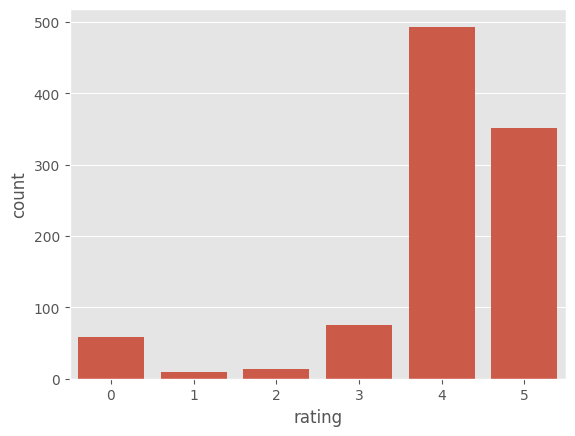

In [126]:
ax = sns.countplot(data=reviews, x='rating')

In [127]:
example = reviews.iloc[55]['review_text']
print(example)

A wonderful, beautifully written, poignant, subtle, and brilliant novel. 
 This is the story of an English butler of one the great houses, whose self value comes from his duty and his dignity, and who questions his values and his life in the end. It is ultimately a story of regret. It is a story that makes you want to live your life and dedicate yourself to things that you won't regret when you look back. One of the best ways of thinking about regret I've ever come across is from Jeff Bezos in his nerdily titled Regret Minimization Framework. 
 But what I really loved about the novel is how slow and forcefully it builds. I don't think I've read a book that does that so well since Pride and Prejudice. In the beginning you think it's just a butler going on a motoring trip. And at the end, your heart is breaking. 
 Dignity is a big theme in the novel. Stevens attempts to define dignity several times throughout the novel - his definition generally has to do with self-respect and keeping on

In [128]:
sentences = sent_tokenize(example)
sentences

['A wonderful, beautifully written, poignant, subtle, and brilliant novel.',
 'This is the story of an English butler of one the great houses, whose self value comes from his duty and his dignity, and who questions his values and his life in the end.',
 'It is ultimately a story of regret.',
 "It is a story that makes you want to live your life and dedicate yourself to things that you won't regret when you look back.",
 "One of the best ways of thinking about regret I've ever come across is from Jeff Bezos in his nerdily titled Regret Minimization Framework.",
 'But what I really loved about the novel is how slow and forcefully it builds.',
 "I don't think I've read a book that does that so well since Pride and Prejudice.",
 "In the beginning you think it's just a butler going on a motoring trip.",
 'And at the end, your heart is breaking.',
 'Dignity is a big theme in the novel.',
 'Stevens attempts to define dignity several times throughout the novel - his definition generally has to

In [129]:
stop_words = set(stopwords.words('english'))

In [130]:
def extract_sentiment_terms(sentence):
    # Tokenize words and tag part of speech
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    sentiment_terms = set()

    for word, tag in tagged_words:
        if word.lower() not in stop_words and word not in string.punctuation:
            if tag.startswith('JJ') or tag.startswith('RB'):
                if word.lower() in opinion_lexicon.positive() or word.lower() in opinion_lexicon.negative():
                    sentiment_terms.add(word)

    return sentiment_terms


In [131]:
sentiment_terms = set()
for sentence in sentences:
    sentiment_terms.update(extract_sentiment_terms(sentence))

In [132]:
sentiment_terms = list(sentiment_terms)
sentiment_terms[0:5]

['well', 'brilliant', 'beautifully', 'self-respect', 'great']

In [133]:
from gensim.models import Word2Vec
import networkx as nx

In [17]:
# get all sentiement terms from all reviews
sentiment_terms = set()
for review in reviews['review_text']:
    sentences = sent_tokenize(review)
    for sentence in sentences:
        sentiment_terms.update(extract_sentiment_terms(sentence))

In [134]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return synonyms

In [135]:
def learn_word_embeddings(processed_corpus):
    # Train a Word2Vec model on the processed corpus
    model = Word2Vec(sentences=processed_corpus,
                     vector_size=100, window=5, min_count=1, workers=4)
    return model       

In [136]:
model = learn_word_embeddings([word_tokenize(word) for word in sentiment_terms])

token = 'amazing'

if token in model.wv:
    print(f"{token}: {model.wv.most_similar(token)}")
else:
    synonyms = get_synonyms(token)

    for synonym in synonyms:
        if synonym in model.wv:
            print(f"{synonym}: {model.wv.most_similar(synonym)}")

In [137]:
import liwc

parse, category_names = liwc.load_token_parser('data/LIWC2007_English100131.dic')

In [138]:
# LIWC 2007
from collections import Counter

gettysburg = '''Four score and seven years ago our fathers brought forth on this continent a new nation, conceived in liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battlefield of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this.'''
gettysburg_tokens = word_tokenize(gettysburg)
# now flatmap over all the categories in all of the tokens using a generator:
gettysburg_counts = {token: category for token in gettysburg_tokens for category in parse(token)}
# and print the results:
print(gettysburg_counts)

{'and': 'incl', 'seven': 'number', 'years': 'relativ', 'ago': 'relativ', 'our': 'social', 'fathers': 'family', 'brought': 'relativ', 'on': 'relativ', 'this': 'ipron', 'a': 'article', 'new': 'relativ', 'nation': 'space', 'in': 'relativ', 'liberty': 'posemo', 'to': 'preps', 'the': 'article', 'that': 'ipron', 'all': 'certain', 'men': 'humans', 'are': 'present', 'created': 'achieve', 'equal': 'quant', 'we': 'incl', 'engaged': 'posemo', 'great': 'posemo', 'war': 'death', 'testing': 'work', 'whether': 'excl', 'or': 'excl', 'any': 'tentat', 'so': 'conj', 'can': 'present', 'long': 'relativ', 'met': 'social', 'battlefield': 'anger', 'of': 'preps', 'have': 'present', 'come': 'relativ', 'portion': 'quant', 'as': 'conj', 'final': 'time', 'resting': 'leisure', 'place': 'relativ', 'for': 'preps', 'those': 'ipron', 'who': 'social', 'here': 'adverb', 'gave': 'social', 'their': 'social', 'might': 'tentat', 'is': 'present', 'altogether': 'certain', 'should': 'discrep', 'do': 'present'}


# Training Dataset

In [139]:
essays = pd.read_csv('data/essays.csv')

## Preprocessing

In [140]:
essays = essays.rename(columns={
    'TEXT': 'text',
    'cEXT': 'extroversion',
    'cNEU': 'neuroticism',
    'cAGR': 'agreeableness',
    'cCON': 'conscientiousness',
    'cOPN': 'openness'
})

# subset the data text + big five

essays = essays[['text', 'extroversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']]

# convert n and y to 0 and 1
essays = essays.replace({'n': 0, 'y': 1})

/var/folders/lg/qth2myc91gj4tfy56qzfn3b40000gn/T/ipykernel_76067/1694335583.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  essays = essays.replace({'n': 0, 'y': 1})


In [141]:
essays

,text,extroversion,neuroticism,agreeableness,conscientiousness,openness
0,"Well, right now I just woke up from a mid-day ...",0,1,1,0,1
1,"Well, here we go with the stream of consciousn...",0,0,1,0,0
2,An open keyboard and buttons to push. The thin...,0,1,0,1,1
3,I can't believe it! It's really happening! M...,1,0,1,1,0
4,"Well, here I go with the good old stream of co...",1,0,1,0,1
...,...,...,...,...,...,...
2462,I'm home. wanted to go to bed but remembe...,0,1,0,1,0
2463,Stream of consiousnesssskdj. How do you s...,1,1,0,0,1
2464,"It is Wednesday, December 8th and a lot has be...",0,0,1,0,0
2465,"Man this week has been hellish. Anyways, now i...",0,1,0,0,1


In [142]:
essays.to_pickle('data/essays.pkl')

# Training the model

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from preprocessing import preprocess_text
from tqdm import tqdm
import pandas as pd
import joblib

In [144]:
tqdm.pandas()

def load_data(file_path):
    # Load Pickled data
    df = pd.read_pickle(file_path)

    df['preprocessed_text'] = df['text'].progress_apply(lambda x: ' '.join(map(str, preprocess_text(x)))) # type: ignore

    df.to_pickle('data/essays_preprocessed.pkl')

    return df

In [166]:
def extract_features(test, label):
    
    # OneVsRestClassifier with Logistic Regression

    vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
    vectorizer.fit(test)

    joblib.dump(vectorizer, 'models/vectorizer.pkl')

    # transform the data
    X = vectorizer.transform(test)

    y = label

    return X, y, vectorizer



In [174]:
def train_logistic_model_O(X_train, y_train):
    # Model training implementation

    model = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
    model.fit(X_train, y_train)
    return model

In [168]:
def train_logistic_model(X_train, y_train):
    # Model training implementation

    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

In [193]:
def train_svm_model(X_train, y_train):
    # Model training implementation

    model = SVC()
    model.fit(X_train, y_train)
    return model

In [194]:
def train_svm_model_O(X_train, y_train):
    # Model training implementation

    model = OneVsRestClassifier(SVC())
    model.fit(X_train, y_train)
    return model

In [147]:
def predict_labels(model, X_test):
    # Prediction implementation
    return model.predict(X_test)

In [148]:
def evaluate_model(y_test, y_pred):
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

In [149]:
df = load_data('data/essays.pkl')

  0%|          | 0/2467 [00:00<?, ?it/s]

 59%|█████▊    | 1449/2467 [07:08<05:00,  3.39it/s]


KeyboardInterrupt: 

In [150]:
df = pd.read_pickle('data/essays_preprocessed.pkl')

In [151]:
df

,text,extroversion,neuroticism,agreeableness,conscientiousness,openness,preprocessed_text
0,"Well, right now I just woke up from a mid-day ...",0,1,1,0,1,"['well', ',', 'right', 'woke', 'mid-day', 'nap..."
1,"Well, here we go with the stream of consciousn...",0,0,1,0,0,"['well', ',', 'go', 'stream', 'consciousness',..."
2,An open keyboard and buttons to push. The thin...,0,1,0,1,1,"['open', 'keyboard', 'buttons', 'push', '.', '..."
3,I can't believe it! It's really happening! M...,1,0,1,1,0,"['ca', ""n't"", 'believe', '!', ""'s"", 'really', ..."
4,"Well, here I go with the good old stream of co...",1,0,1,0,1,"['well', ',', 'go', 'good', 'old', 'stream', '..."
...,...,...,...,...,...,...,...
2462,I'm home. wanted to go to bed but remembe...,0,1,0,1,0,"[""'m"", 'home', '.', 'wanted', 'go', 'bed', 're..."
2463,Stream of consiousnesssskdj. How do you s...,1,1,0,0,1,"['stream', 'consiousnesssskdj', '.', 'spell', ..."
2464,"It is Wednesday, December 8th and a lot has be...",0,0,1,0,0,"['wednesday', ',', 'december', '8th', 'lot', '..."
2465,"Man this week has been hellish. Anyways, now i...",0,1,0,0,1,"['man', 'week', 'hellish', '.', 'anyways', ','..."


In [197]:
results = {}

X, y, vectorizer = extract_features(df['preprocessed_text'], df[['extroversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = train_svm_model_O(X_train, y_train)

# Predict the labels
y_pred = predict_labels(model, X_test)

# Evaluate the model
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

results['Logistic Regression'] = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1
}

joblib.dump(model, 'models/logistic_regression.pkl')

results

{'Logistic Regression': {'accuracy': 0.05465587044534413,
  'precision': 0.5918732510071519,
  'recall': 0.6158583525789069,
  'f1': 0.602117682675407}}

In [176]:
trait = ['extroversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']

for t in trait:
    # Extract the features
    X, y, vectorizer = extract_features(df['preprocessed_text'], df[t])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = train_logistic_model(X_train, y_train)

    # Predict the labels
    y_pred = predict_labels(model, X_test)

    # Evaluate the model
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
    results[t] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

    # Save the model
    joblib.dump(model, f'models/{t}_model.pkl')

# save the results
results_df = pd.DataFrame(results).T
results_df.to_csv('results/results.csv')


results_df

,accuracy,precision,recall,f1
Logistic Regression,0.066802,0.588536,0.605851,0.595900
extroversion,0.552632,0.551635,0.552632,0.552023
neuroticism,0.574899,0.578739,0.574899,0.574690
agreeableness,0.528340,0.519925,0.528340,0.520523
conscientiousness,0.558704,0.561620,0.558704,0.559422
openness,0.623482,0.624988,0.623482,0.623581


# testing model 

In [192]:
test_sentence = "I am a very happy person."

# Load the model
model = joblib.load(f'models/logistic_regression.pkl')

# Load the vectorizer
vectorizer = joblib.load('models/vectorizer.pkl')

# Preprocess the text
test_sentence_processed = preprocess_text(test_sentence)
if test_sentence_processed is not None:
    test_sentence_processed = ' '.join(map(str, test_sentence_processed)) # type: ignore
else:
    print("Error: preprocess_text returned None")

# Vectorize the text
test_sentence_vectorized = vectorizer.transform([test_sentence_processed])

# Predict the label
prediction = model.predict(test_sentence_vectorized)

# format prediction to human readable OCEAN traits

traits = ['extroversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']

prediction = {trait: prediction[0][i] for i, trait in enumerate(traits)}

prediction

{'extroversion': 1,
 'neuroticism': 1,
 'agreeableness': 1,
 'conscientiousness': 0,
 'openness': 1}